# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*, (under revision).

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

*Note*: Refine a network based after the network was trained on just a few labeled images is illustrated in "Demo-labeledexample-MouseReaching.ipynb". This demo also contains an already labeled data set and is perhaps the best starting point for brand new users.

## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut

In [4]:
task='sc' # Enter the name of your experiment Task
experimenter='Fassihi' # Enter the name of the experimenter
video=['D:\\Notebook\\sc\\videos\\video14-23-26.avi'] # Enter the paths of your videos you want to grab frames from.

# deeplabcut.create_new_project(task,experimenter,video, working_directory='Full path of the working directory',copy_videos=True/False) #change the working directory to where you want the folders created.
deeplabcut.create_new_project(task,experimenter,video, working_directory='D:\\Notebook\\sc',copy_videos=True) #change the working directory to where you want the folders created.

Created "D:\Notebook\sc\sc-Fassihi-2018-12-15\videos"
Created "D:\Notebook\sc\sc-Fassihi-2018-12-15\labeled-data"
Created "D:\Notebook\sc\sc-Fassihi-2018-12-15\training-datasets"
Created "D:\Notebook\sc\sc-Fassihi-2018-12-15\dlc-models"
Copying the videos
D:\Notebook\sc\videos\video14-23-26.avi
Generated "D:\Notebook\sc\sc-Fassihi-2018-12-15\config.yaml"

A new project with name sc-Fassihi-2018-12-15 is created at D:\Notebook\sc and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos' to add new videos to your project (at any stage).


'D:\\Notebook\\sc\\sc-Fassihi-2018-12-15\\config.yaml'

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

Reading config file successfully...
Make sure you change the crop parameters in the config.yaml file. The default parameters are set to the video dimensions.


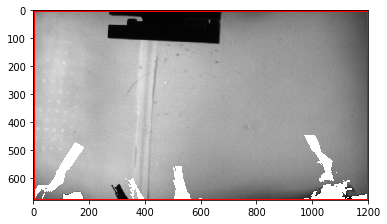

The red boundary indicates how the cropped image will look.
Is the cropping ok? (yes/no): yes
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 65.0  seconds.

Frames are selected.
You can now label the frames using the function 'label_frames'.


In [5]:
%matplotlib inline
path_config_file = 'D:\\Notebook\\sc\\sc-Fassihi-2018-12-15\\config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)
deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=True, checkcropping=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#You can change the cropping to false, then delete the checkcropping part!

## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [6]:
%gui wx
deeplabcut.label_frames(path_config_file)

Working on folder: video14-23-26
Working on folder: video14-23-26


RuntimeError: wrapped C/C++ object of type FigureCanvasWxAgg has been deleted

<Figure size 829.44x524.88 with 2 Axes>

**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [7]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by Fassihi.
They are stored in the following folder: D:\Notebook\sc\sc-Fassihi-2018-12-15\labeled-data\video14-23-26_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [8]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Start training - If you want to use a CPU, continue. 
### If yu want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [9]:
deeplabcut.train_network(path_config_file)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_scDec15\\sc_Fassihi95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Arash\\Anaconda3\\envs\\Myenv2\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_scDec15\\Documentation_data-sc_95shuffle1.pickle',
 'minsize': 100,
 'mirror': Fal

INFO:tensorflow:Restoring parameters from C:\Users\Arash\Anaconda3\envs\Myenv2\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt


Restoring parameters from C:\Users\Arash\Anaconda3\envs\Myenv2\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt


Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'D:\\Notebook\\sc\\sc-Fassihi-2018-12-15\\dlc-models\\iteration-0\\scDec15-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 400, 'bottomheight': 400, 'all_joints': [[0], [1], [2], [3]], 'all_joints_names': ['hand', 'Finger1', 'Finger2', '

iteration: 1000 loss: 0.0184 lr: 0.005
iteration: 2000 loss: 0.0087 lr: 0.005
iteration: 3000 loss: 0.0067 lr: 0.005
iteration: 4000 loss: 0.0054 lr: 0.005
iteration: 5000 loss: 0.0051 lr: 0.005
iteration: 6000 loss: 0.0044 lr: 0.005
iteration: 7000 loss: 0.0040 lr: 0.005
iteration: 8000 loss: 0.0038 lr: 0.005
iteration: 9000 loss: 0.0036 lr: 0.005
iteration: 10000 loss: 0.0034 lr: 0.005
iteration: 11000 loss: 0.0059 lr: 0.02
iteration: 12000 loss: 0.0046 lr: 0.02
iteration: 13000 loss: 0.0037 lr: 0.02
iteration: 14000 loss: 0.0033 lr: 0.02
iteration: 15000 loss: 0.0031 lr: 0.02
iteration: 16000 loss: 0.0028 lr: 0.02
iteration: 17000 loss: 0.0026 lr: 0.02
iteration: 18000 loss: 0.0027 lr: 0.02
iteration: 19000 loss: 0.0027 lr: 0.02
iteration: 20000 loss: 0.0024 lr: 0.02
iteration: 21000 loss: 0.0022 lr: 0.02
iteration: 22000 loss: 0.0024 lr: 0.02
iteration: 23000 loss: 0.0022 lr: 0.02
iteration: 24000 loss: 0.0021 lr: 0.02
iteration: 25000 loss: 0.0022 lr: 0.02
iteration: 26000 loss: 0

KeyboardInterrupt: 

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [10]:
deeplabcut.evaluate_network(path_config_file)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_scDec15\\sc_Fassihi95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Arash\\Anaconda3\\envs\\Myenv2\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_scDec15\\Documentation_data-sc_95shuffle1.pickle',
 'minsize': 100,
 'mirror': Fal

Running  DeepCut_resnet50_scDec15shuffle1_100000  with # of trainingiterations: 100000
INFO:tensorflow:Restoring parameters from D:\Notebook\sc\sc-Fassihi-2018-12-15\dlc-models\iteration-0\scDec15-trainset95shuffle1\train\snapshot-100000


Restoring parameters from D:\Notebook\sc\sc-Fassihi-2018-12-15\dlc-models\iteration-0\scDec15-trainset95shuffle1\train\snapshot-100000


Analyzing data...


20it [00:04,  4.68it/s]


Done and results stored for snapshot:  snapshot-100000
Results for 100000  training iterations: 95 1 train error: 1.58 pixels. Test error: 6.42  pixels.
With pcutoff of 0.1  train error: 1.58 pixels. Test error: 6.42 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [ ]:
videofile_path = ['D:\\Notebook\\sc\\sc-Fassihi-2018-12-15\\videos\video14-27-11.avi'] #Enter the list of videos to analyze.
#videofile_path = ['D:\Notebook\sc\sc-Fassihi-2018-12-15\videos\video14-23-26.avi','D:\Notebook\sc\sc-Fassihi-2018-12-15\videos\video14-23-19.avi','D:\Notebook\sc\sc-Fassihi-2018-12-15\videos\video14-23-08.avi'] #Enter the list of videos to analyze.

deeplabcut.analyze_videos(path_config_file,videofile_path)

## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,['D:\\Notebook\\sc\\sc-Fassihi-2018-12-15\\videos\video14-27-11.avi''])

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

RuntimeError: wrapped C/C++ object of type FileDialog has been deleted

In [0]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [0]:
deeplabcut.create_training_dataset(path_config_file)

## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [ ]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [0]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)